In [1]:
import numpy as np
import pandas as pd
#import scipy.stats as stats #comment if deprecated
from scipy import stats #use this way
import matplotlib.pyplot as plt

In [2]:
def random_sampling(population, sample_size, replace = False):
    random_sample = np.random.choice(population, size = sample_size, replace = replace)
    return list(random_sample)

In [12]:
def show_curve(t, critical):
    x = np.linspace(-4, 4, 1000)  # Range for t-distribution
    y = stats.t.pdf(x, df=len(sample) - 1)  # PDF of t-distribution
     
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='t-distribution', color='blue')

    if tail == 1: # Left-tailed
        plt.fill_between(x, y, where=(x < critical), color='red', alpha=0.5, label='Critical Region')
    elif tail == 2: # Two-tailed
        critical_left = stats.t.ppf(alpha / 2, df=len(sample) - 1)
        critical_right = stats.t.ppf(1 - alpha / 2, df=len(sample) - 1)
        plt.fill_between(x, y, where=(x < critical_left), color='red', alpha=0.5, label='Critical Region (Left)')
        plt.fill_between(x, y, where=(x > critical_right), color='red', alpha=0.5, label='Critical Region (Right)')
    else: # Right-tailed
        plt.fill_between(x, y, where=(x > critical), color='red', alpha=0.5, label='Critical Region')
    
    plt.axvline(t, color='orange', linestyle='--', label='T-Statistic') # T Statistic
    plt.title('T-Test: Critical Region and T-Statistic')
    plt.xlabel('T Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid()
    plt.show()

In [13]:
def t_test(sample, population_mean, alpha, tail):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    n = len(sample)
    t = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
    dof = n - 1
    
    if tail == 1: # Left-tailed
        critical = stats.t.ppf(alpha, dof)
    elif tail == 2: # Two-tailed
        critical = stats.t.ppf(1 - alpha/2, dof)
    else: # Right-tailed
        critical = stats.t.ppf(1 - alpha, dof)
    show_curve(t, critical)
    print(f"T-Statistic: {t:.4f}, Sample Mean: {sample_mean:.4f}")
    print(f"Critical Value: {critical:.4f}")
    if tail == 1 and t < critical:
        print(f"{t:.4f} < {critical:.4f} Reject the null hypothesis (left-tailed).")
    elif tail == 2 and (t < -critical or t > critical):
        expr = (f"{t:.4f} < {-critical:.4f}") if t < -critical else (f"{t:.4f} > {critical:.4f}")
        print(f"{expr} Reject the null hypothesis (two-tailed).")
    elif tail == 3 and t > critical:
        print(f"{t:.4f} > {critical:.4f} Reject the null hypothesis (right-tailed).")
    else:
        print(f"Fail to reject the null hypothesis.")

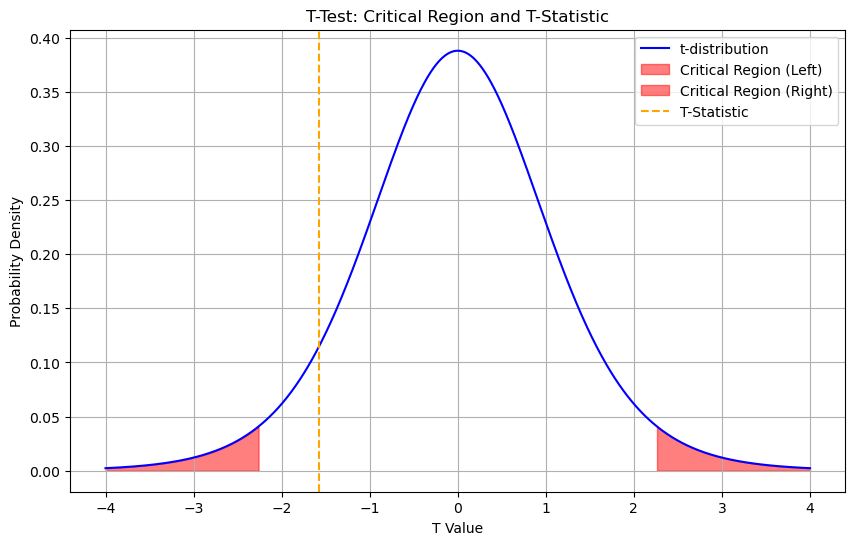

T-Statistic: -1.5721, Sample Mean: 163.7000
Critical Value: 2.2622
Fail to reject the null hypothesis.


In [15]:
file_path = "height_weight_bmi.csv"
column = "Standing Height (cm)"
N = 1000
df = pd.read_csv(file_path) #dataset
df = pd.DataFrame(df).iloc[:N] #1000 records are fetched not all
population = list(df[column].values) #Height column is the population
population_mean = 170
sample_size = 10
sample = random_sampling(population, sample_size)
alpha = 0.05
tail = 2 # Change to 1 for left-tailed, 2 for two-tailed, 3 for right-tailed
t_test(sample, population_mean, alpha, tail)